In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Load Dataset
df = pd.read_excel(r"C:\Users\ashis\Downloads\data for ironheck\creditcardmarketing.xlsx")  
# Clean column names
df.columns = df.columns.str.strip()

# Check for NaN values
print("Missing values per column:\n", df.isnull().sum())

# Check for infinite values only in numerical columns
numerical_cols = ['# Bank Accounts Open', '# Credit Cards Held', '# Homes Owned', 'Household Size', 'Average Balance', 'Q1 Balance', 'Q2 Balance', 'Q3 Balance', 'Q4 Balance']
has_infinite = df[numerical_cols].apply(np.isinf).any().any()
print("\nAny infinite values in numerical columns?", has_infinite)

# Replace infinite values with NaN if any
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values
df.dropna(inplace=True)

# Check the unique values in the target column
print("\nUnique values in 'Offer Accepted':", df['Offer Accepted'].unique())

# Define features (X) and target (y)
X = df.drop('Offer Accepted', axis=1)
y = df['Offer Accepted']

# Convert target variable to binary
y = y.map({'Yes': 1, 'No': 0})

# Define categorical columns
categorical_cols = ['Reward', 'Mailer Type', 'Income Level', 'Overdraft Protection', 'Credit Rating', 'Own Your Home']

# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ]
)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define a pipeline for data transformation and model training
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Train the model
model_pipeline.fit(X_train, y_train)

# Make predictions
y_pred = model_pipeline.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Missing values per column:
 Customer Number          0
Offer Accepted           0
Reward                   0
Mailer Type              0
Income Level             0
# Bank Accounts Open     0
Overdraft Protection     0
Credit Rating            0
# Credit Cards Held      0
# Homes Owned            0
Household Size           0
Own Your Home            0
Average Balance         24
Q1 Balance              24
Q2 Balance              24
Q3 Balance              24
Q4 Balance              24
dtype: int64

Any infinite values in numerical columns? False

Unique values in 'Offer Accepted': ['No' 'Yes']
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      5079
           1       0.00      0.00      0.00       314

    accuracy                           0.94      5393
   macro avg       0.47      0.50      0.49      5393
weighted avg       0.89      0.94      0.91      5393

Accuracy: 0.9417763767847209


C:\Users\ashis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ashis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ashis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Missing values per column:
 Customer Number          0
Offer Accepted           0
Reward                   0
Mailer Type              0
Income Level             0
# Bank Accounts Open     0
Overdraft Protection     0
Credit Rating            0
# Credit Cards Held      0
# Homes Owned            0
Household Size           0
Own Your Home            0
Average Balance         24
Q1 Balance              24
Q2 Balance              24
Q3 Balance              24
Q4 Balance              24
dtype: int64


C:\Users\ashis\AppData\Local\Temp\ipykernel_21756\1728202569.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)  # Simple strategy for filling NaNs


Logistic Regression Accuracy: 0.94
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      3387
           1       0.00      0.00      0.00       213

    accuracy                           0.94      3600
   macro avg       0.47      0.50      0.48      3600
weighted avg       0.89      0.94      0.91      3600

Decision Tree Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      3387
           1       0.10      0.11      0.10       213

    accuracy                           0.89      3600
   macro avg       0.52      0.52      0.52      3600
weighted avg       0.89      0.89      0.89      3600



C:\Users\ashis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ashis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ashis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest Accuracy: 0.94
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      3387
           1       0.00      0.00      0.00       213

    accuracy                           0.94      3600
   macro avg       0.47      0.50      0.48      3600
weighted avg       0.89      0.94      0.91      3600



C:\Users\ashis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ashis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ashis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Support Vector Machine Accuracy: 0.94
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      3387
           1       0.00      0.00      0.00       213

    accuracy                           0.94      3600
   macro avg       0.47      0.50      0.48      3600
weighted avg       0.89      0.94      0.91      3600



C:\Users\ashis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ashis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ashis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


K-Nearest Neighbors Accuracy: 0.94
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      3387
           1       0.00      0.00      0.00       213

    accuracy                           0.94      3600
   macro avg       0.47      0.50      0.48      3600
weighted avg       0.89      0.94      0.91      3600



C:\Users\ashis\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


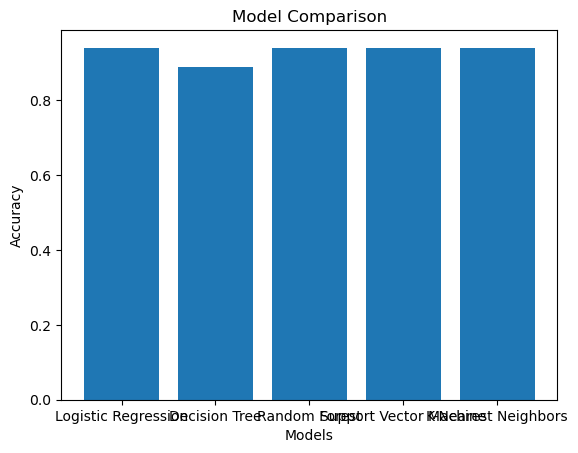

In [14]:

df = pd.read_excel(r"C:\Users\ashis\Downloads\data for ironheck\creditcardmarketing.xlsx")

# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

# Replace any infinite values (if they exist) with NaN and then fill NaN values
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(df.mean(), inplace=True)  # Simple strategy for filling NaNs

# Convert categorical columns to numerical using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Define features and target variable
X = df.drop('Offer Accepted_Yes', axis=1)  # Adjust target column name as needed
y = df['Offer Accepted_Yes']  # Assuming 'Offer Accepted' is the target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models to compare
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f'{name} Accuracy: {accuracy:.2f}')
    print(classification_report(y_test, y_pred))

# Visualize the results
plt.bar(results.keys(), results.values())
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.show()